# SubBeamNod Data Reduction
---------------------------
This notebook shows how to use `dysh` to calibrate an SubBeamNod observation via two different methods. It retrieves and calibrates SubBeamNod scans using `GBTFITSLoad.subbeamnod()` which returns a `ScanBlock` object. 

In [1]:
import os
import wget
from dysh.fits.gbtfitsload import GBTFITSLoad

## First, we download the example SDFITS data, if necessary.

In [2]:
filename="TRCO_230413_Ka.raw.vegas.A.fits"
if not os.path.isfile(filename):
    url = f"http://www.gb.nrao.edu/dysh/example_data/subbeamnod-Ka/data/TRCO_230413_Ka.raw.vegas/{filename}"
    print(f"Downloading {filename}")
    wget.download(url,out=filename)
    print(f"\nRetrieved {filename}")
else:
    print(f"{filename} already downloaded")

TRCO_230413_Ka.raw.vegas.A.fits already downloaded


## Now, load the SDFITS file and examine it.

In [3]:
sdfits = GBTFITSLoad(filename)

The returned `sdfits` can be probed for information.
You can also print a concise (or verbose if you choose verbose=True) summary of the data.

In [4]:
sdfits.info()
sdfits.summary()

Filename: TRCO_230413_Ka.raw.vegas.A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  SINGLE DISH    1 BinTableHDU    245   5280R x 74C   ['32A', '1D', '22A', '1D', '1D', '1D', '1024E', '16A', '6A', '8A', '1D', '1D', '1D', '4A', '1D', '4A', '1D', '1I', '32A', '32A', '1J', '32A', '16A', '1E', '8A', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '8A', '1D', '1D', '12A', '1I', '1I', '1D', '1D', '1I', '1A', '1I', '1I', '16A', '16A', '1J', '1J', '22A', '1D', '1D', '1I', '1A', '1D', '1E', '1D', '1D', '1D', '1D', '1D', '1A', '1A', '8A', '1E', '1E', '16A', '1I', '1I', '1I']   


,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,32,1256-0547,0.0,Nod,1,26.5,26.5,1,2,60,2,160.975324,43.884984
1,33,1256-0547,0.0,Nod,2,26.5,26.5,1,2,60,2,161.174093,43.928449
2,34,1256-0547,0.0,Nod,1,30.5,30.5,1,2,60,2,161.589629,44.000491
3,35,1256-0547,0.0,Nod,2,30.5,30.5,1,2,60,2,161.783395,44.041622
4,36,1256-0547,0.0,Unknown,0,0.75,0.75,1,2,120,2,162.124052,44.100404
5,37,1256-0547,0.0,Nod,1,34.5,34.5,1,2,60,2,162.611075,44.183661
6,38,1256-0547,0.0,Nod,2,34.5,34.5,1,2,60,2,162.896506,44.237997
7,39,1256-0547,0.0,Nod,1,37.5,37.5,1,2,60,2,163.333508,44.306385
8,40,1256-0547,0.0,Nod,2,37.5,37.5,1,2,60,2,163.529285,44.343704
9,41,1256-0547,0.0,Nod,1,30.5,30.5,1,2,60,2,164.941425,44.559629


## The SubBeamNod scans are 43, 46, and 54. 
Retrieve and calibrate a SubBeamNod scan. There are two different methods for calibrating a SubBeamNod scan.  The first, with `method='cycle'` (the default) averages the data in each subreflector state for each cycle of integrations. 

In [5]:
w='tsys'
sbnk = sdfits.subbeamnod(scan=43,fdnum=1,ifnum=0,weights=w, method='cycle')

####  Time average it, then plot it.  Here, we use system temperature weighting.

In [6]:
ta = sbnk.timeaverage(weights=w)

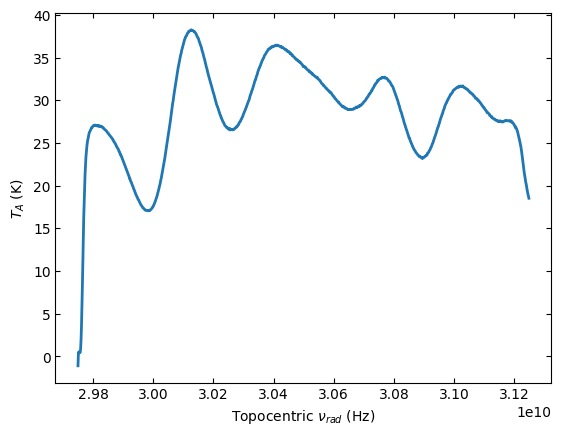

In [7]:
ta.plot()

## Now the other method.
The second method ("scan") of calibrating SubBeamNod scans reproduces the method of GBTIDL's `snodka.pro`.  This method is less accurate because it treats the entire group of integrations as one cycle. 


In [8]:
sbnk2 = sdfits.subbeamnod(scan=43,fdnum=1,ifnum=0,weights=w, method='scan')

In [9]:
ta2 = sbnk2.timeaverage(weights=None)

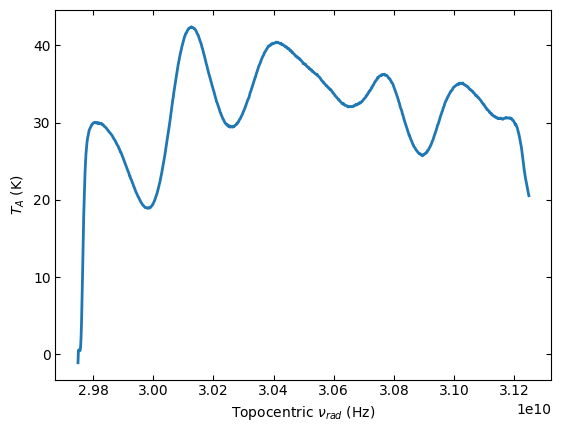

In [10]:
ta2.plot()

## The difference between the two methods can be see by subtracting the spectra and plotting.


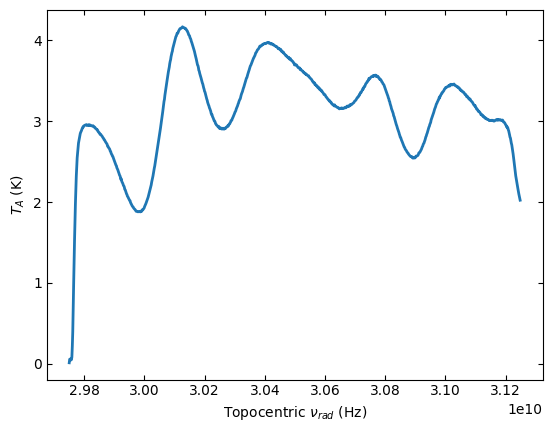

In [11]:
(ta2-ta).plot()

---------------

## Now do calibration using selection instead

In [12]:
sdfits.select(scan=43,fdnum=1,ifnum=0)
sdfits.selection.show()

 ID    TAG    SCAN IFNUM FDNUM # SELECTED
--- --------- ---- ----- ----- ----------
  0 21074f588   43     0     1        240


In [13]:
sb=sdfits.subbeamnod(weights=w)

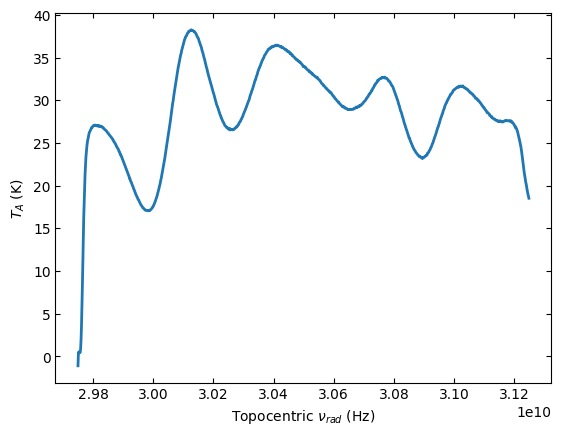

In [14]:
sb.timeaverage(weights=w).plot()

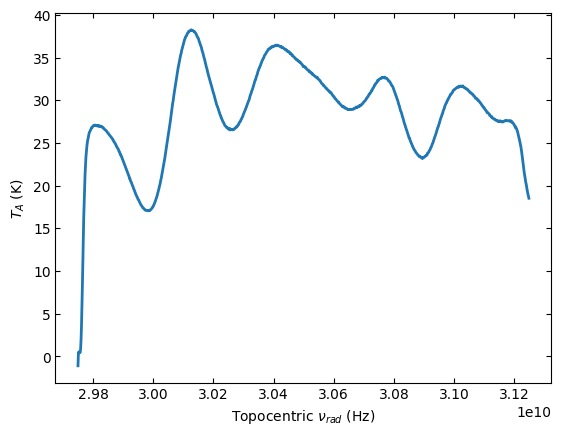

In [15]:
sdfits.subbeamnod().timeaverage().plot()

In [16]:
sb3=sdfits.subbeamnod(method='scan')

/home/mpound/src/dysh/src/dysh/util/selection.py:433: UserWarning: A rule that results in an identical selection has already been added: ID: 0, TAG:21074f588. Ignoring.
  warnings.warn(


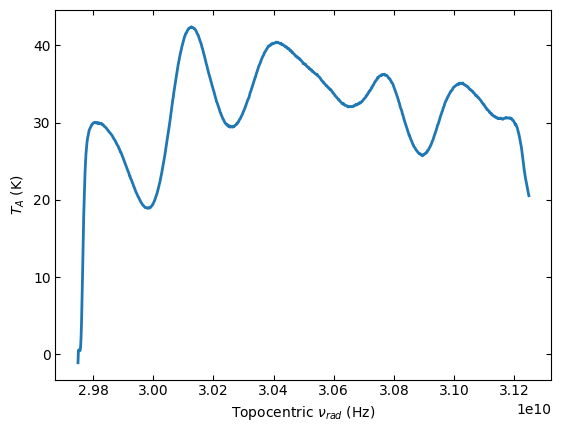

In [17]:
sb3[0].timeaverage().plot()